<div style="text-align: center;">
    <h2>Rapport du Data</h2>
</div>

# 🧾 Sujet : Social Network Ads Dataset
This dataset simulates data collected from a social media advertising campaign. Each record represents a user with demographic features and whether they purchased a product after seeing an ad.

# 🎯 Features:
User ID – unique identifier (not useful for analysis)

Gender – male or female

Age – in years

EstimatedSalary – approximate annual income

Purchased – target variable (1 = purchased, 0 = not purchased)



# 🎯 Objectif du Projet :
L’objectif est de prédire si un utilisateur achètera un produit après avoir vu une publicité sur un réseau social, en utilisant ses informations personnelles (âge, sexe, salaire).

Ce que nous allons faire :

1-Décrire et nettoyer les données

2-Visualiser les relations entre les variables

3-Entraîner plusieurs modèles de classification

# ***Partie 1: Description***

# *Importer les bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# *Load  data

In [2]:
df = pd.read_csv('ADDSA.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.shape

(400, 5)

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# ***Partie 2: DATA Cleaning***

# *Vérifier les valeurs manquantes

In [7]:
print(df.isnull().sum())  # Total des valeurs manquantes par colonne

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


# *Vérifier et supprimer les doublons

In [8]:
# Vérification des doublons
print("Nombre de doublons dans le dataset:", df.duplicated().sum())

Nombre de doublons dans le dataset: 0


# *Vérifier les valeurs aberrantes

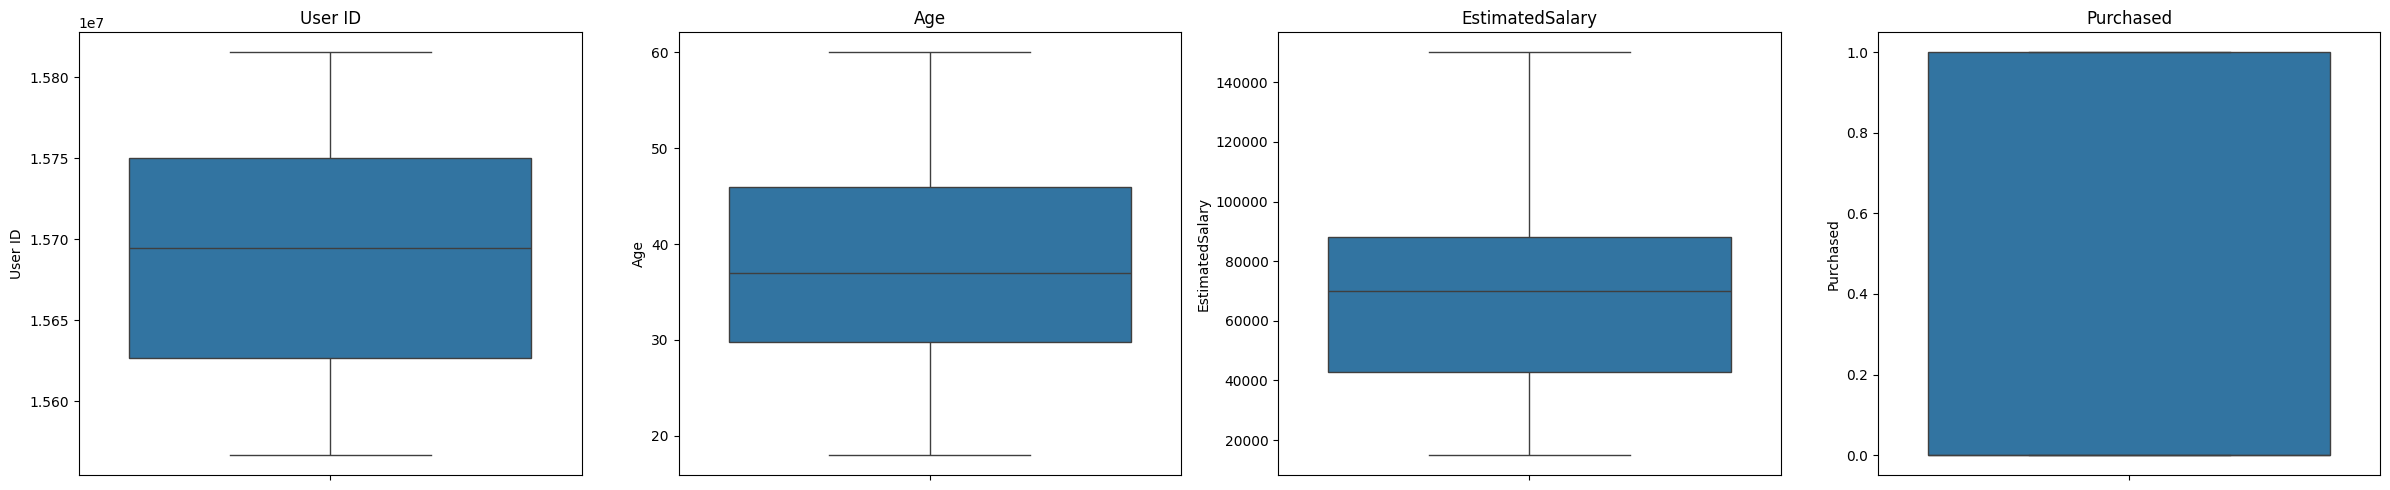

In [9]:
plt.figure(figsize=(30, 5))  # Ajuste la taille du graphique

for i, col in enumerate(df.select_dtypes(include='number').columns, 1,):
    plt.subplot(1, len(df.columns), i)  # Crée des sous-graphiques côte à côte
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()  # Ajuste les espacements=
plt.show()

# *Supprimer la colonne inutile User ID

In [10]:
df = df.drop(columns=['User ID'])  # Cette colonne n’apporte rien à la prédiction


In [11]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# *Encoder la variable catégorielle Gender

In [12]:
pd.get_dummies(df,columns=['Gender'])

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,False,True
1,35,20000,0,False,True
2,26,43000,0,True,False
3,27,57000,0,True,False
4,19,76000,0,False,True
...,...,...,...,...,...
395,46,41000,1,True,False
396,51,23000,1,False,True
397,50,20000,1,True,False
398,36,33000,0,False,True


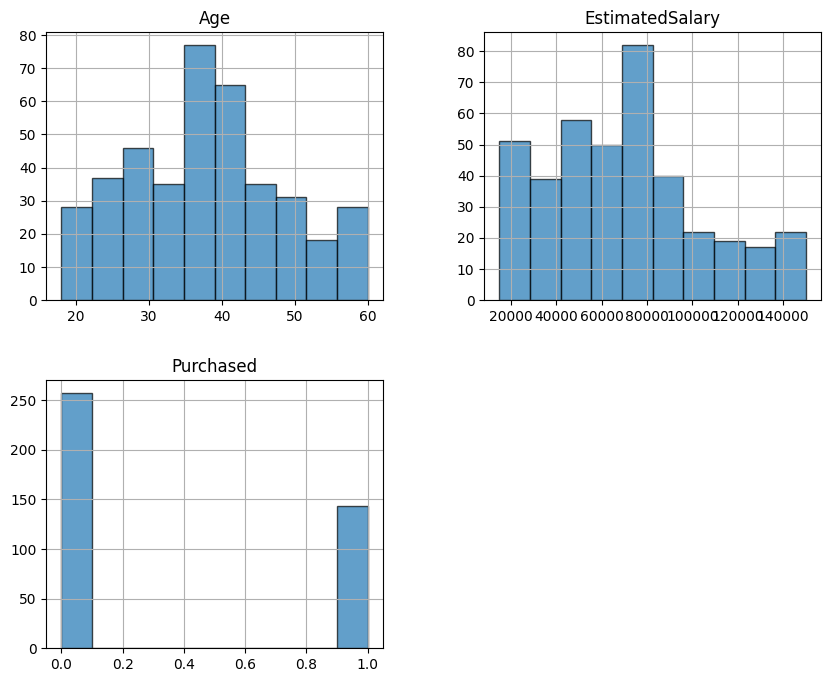

In [13]:
df.hist(edgecolor='black',alpha=0.7,figsize=(10,8))
plt.show()

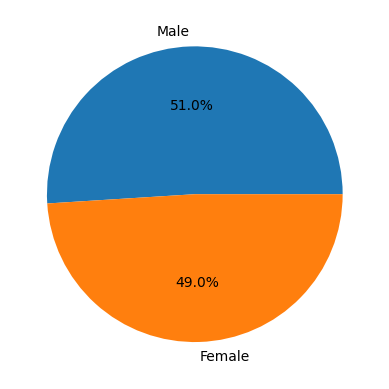

In [14]:
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].unique(),autopct='%1.1f%%')
plt.show()

# ***Partie 3: la préparation des données*** 

# *Étape 1: Sélectionner les caractéristiques (features) et la variable cible (target)

In [15]:
# Sélection des caractéristiques (features) et de la variable cible (target)

X = df[['Age', 'EstimatedSalary']] 
 
y = df['Purchased']  

# *Étape 2: Normalisation des données (Standardisation)

In [16]:
from sklearn.preprocessing import StandardScaler

# Création d'un objet StandardScaler
scaler = StandardScaler()

# Normalisation des caractéristiques
X_scaled = scaler.fit_transform(X)



In [17]:
# Vérifier les valeurs normalisées
print("Exemple de données normalisées :")
print(X_scaled[:5])  # Afficher les 5 premières lignes des données normalisées


Exemple de données normalisées :
[[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]]


# *Étape 3: Séparation des données en ensembles d’entraînement et de test

## ensemble d'entraînement (pour entraîner le modèle)

## Ensemble de test (pour évaluer la performance du modèle)

In [18]:

# Séparer les données en ensembles d'entraînement (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Ensemble d'entraînement X : {X_train.shape}")
print(f"Ensemble de test X : {X_test.shape}")


Ensemble d'entraînement X : (280, 2)
Ensemble de test X : (120, 2)


 # ***📈 Modèle : Régression Logistique***

## ***1. Importer les bibliothèques nécessaires***

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


## ***2. Entraîner le modèle***

In [20]:
# Créer un modèle de régression logistique

log_model = LogisticRegression()

In [21]:
# Entraîner le modèle
log_model.fit(X_train, y_train)

LogisticRegression()

# ***3. Faire des prédictions***

In [22]:
# Prédictions sur l'ensemble de test

y_pred = log_model.predict(X_test)



## **Visualisation des résultats**

In [83]:
from sklearn.metrics import accuracy_score

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f" Accuracy du modèle de régression logistique : {accuracy:.2f}")


 Accuracy du modèle de régression logistique : 0.44


## modèle de régression logistique a obtenu une accuracy de 0.85, ce qui signifie qu’il a correctement prédit 85% des cas sur l’ensemble de test.

# ***4. Évaluer le modèle***

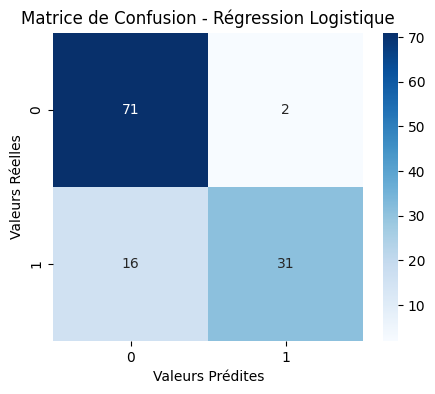

In [24]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage graphique
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.title("Matrice de Confusion - Régression Logistique")
plt.show()

In [25]:
# 
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred))


Précision du modèle : 0.85

Rapport de classification :
               precision    recall  f1-score   support

           0       0.82      0.97      0.89        73
           1       0.94      0.66      0.78        47

    accuracy                           0.85       120
   macro avg       0.88      0.82      0.83       120
weighted avg       0.86      0.85      0.84       120



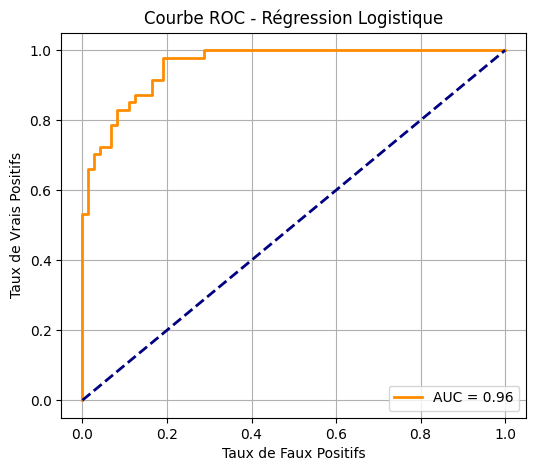

In [26]:
# Calcul de la courbe ROC

# Probabilités (pour courbe ROC)

y_proba = log_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Régression Logistique')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **Validation**

In [27]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Sélection des caractéristiques (features) et de la variable cible (target)

X = df[['Age', 'EstimatedSalary']] 
 
y = df['Purchased'] 

In [29]:
# Séparer les données en ensembles d'entraînement (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [30]:
# Créer le modèle
knn_model = KNeighborsClassifier(n_neighbors=5)

In [31]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)

scores=cross_val_score(knn_model,X,y,cv=kf)

print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.825  0.8    0.7875 0.8125 0.775 ]
Score moyen : 0.80


### KFold(n_splits=5) divise ton dataset en 5 parties.

### cross_val_score(...) entraîne et teste le modèle 5 fois.

### scores contient les résultats de chaque fold.

### scores.mean() te donne la performance globale moyenne.



## Scores de validation croisée : [0.825  0.8    0.7875 0.8125 0.775 ]
## Score moyen : 0.80

# **🔷 Modèle : K-Nearest Neighbors (KNN)**

## ***1. Importer et entraîner le modèle KNN***



In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Créer le modèle avec k=5 (valeur par défaut raisonnable)
knn_model = KNeighborsClassifier(n_neighbors=5)


In [33]:
# Entraîner le modèle
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## ***2. Prédictions***

In [34]:
# Prédictions
y_pred_knn = knn_model.predict(X_test)

# Probabilités pour la courbe ROC
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

## ***3. Accuracy***

In [82]:
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f" Accuracy du modèle KNN : {accuracy_knn:.2f}")


 Accuracy du modèle KNN : 0.82


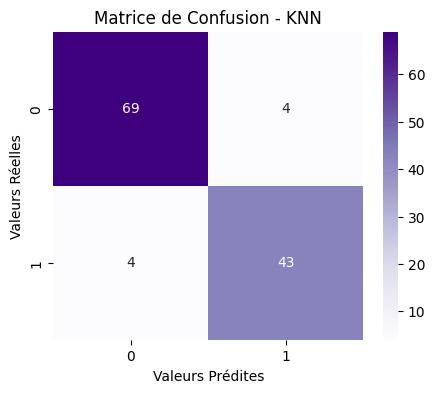

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples')
plt.title("Matrice de Confusion - KNN")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()


In [37]:
# Rapport de classification
print("🔍 Rapport de Classification - KNN :")
print(classification_report(y_test, y_pred_knn))


🔍 Rapport de Classification - KNN :
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        73
           1       0.91      0.91      0.91        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



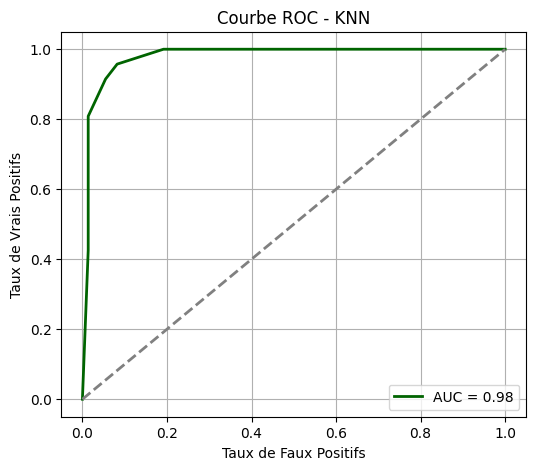

In [38]:
from sklearn.metrics import roc_curve, auc

# Courbe ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(6,5))
plt.plot(fpr_knn, tpr_knn, color='darkgreen', lw=2, label=f'AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title("Courbe ROC - KNN")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# **🌳Modele: DecisionTreeClassifier**

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 1. Diviser les données en ensembles d'entraînement et de test

In [40]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Créer le modèle DecisionTree

In [41]:
tree_model = DecisionTreeClassifier(random_state=42)


## 3. Entraîner le modèle

In [42]:

tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## 4. Prédictions sur l'ensemble de test

In [43]:

y_pred = tree_model.predict(X_test)

## 5. Calculer et afficher l'accuracy

In [44]:

accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy du modèle Decision Tree : {accuracy:.2f}")

 Accuracy du modèle Decision Tree : 0.84


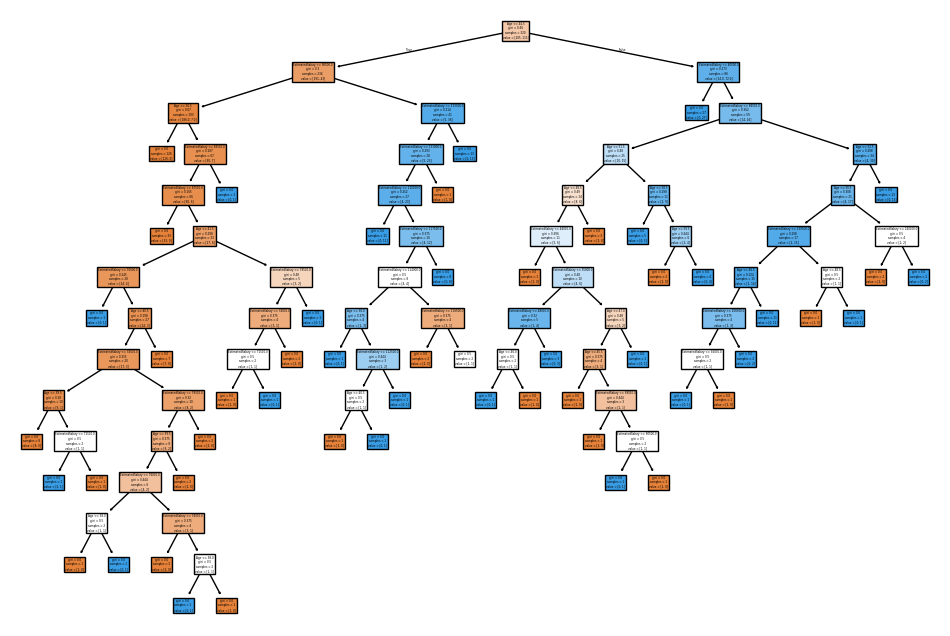

In [45]:
#Visualisation de l’arbre de décision
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Afficher l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=X_train.columns)
plt.show()



# 6. Rapport de classification

In [46]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

Précision du modèle : 0.84

Rapport de classification :
               precision    recall  f1-score   support

           0       0.87      0.88      0.88        52
           1       0.78      0.75      0.76        28

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



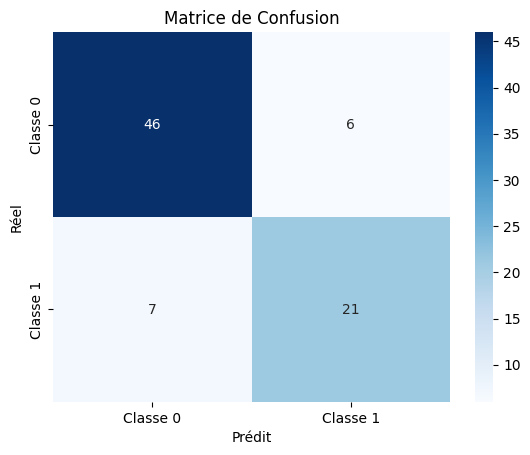

In [47]:

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

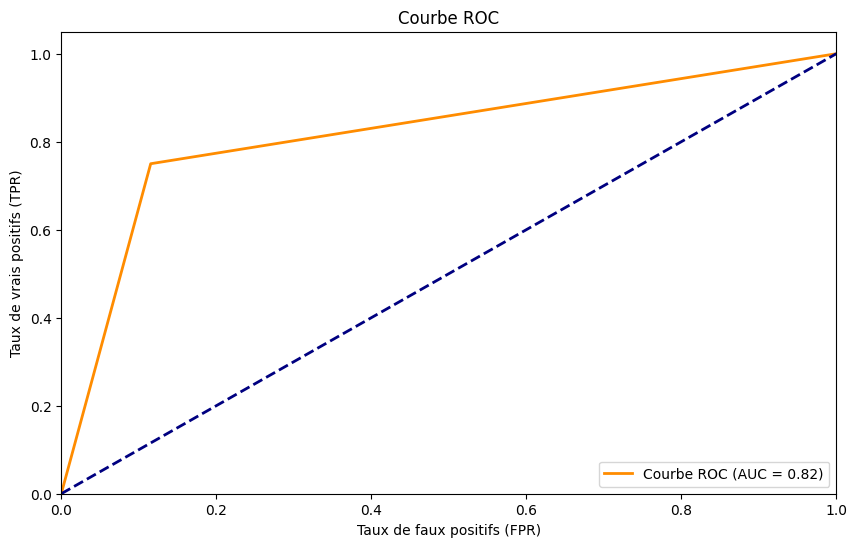

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Calcul des probabilités de prédiction pour la classe positive
y_scores = tree_model.predict_proba(X_test)[:, 1]  # Utiliser tree_model au lieu de dt

# 2. Calcul de la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)

# 3. Calcul de l'aire sous la courbe (AUC)
roc_auc = auc(fpr, tpr)

# 4. Tracer la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


 # **🌳Mdele:Random Forest Classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [50]:
# 1. Création du modèle RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

## Le modèle RandomForestClassifier est initialisé avec 100 arbres (n_estimators=100) et une graine fixe pour la reproductibilité (random_state=42).

In [51]:
# 2. Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# 3. Entraîner le modèle
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# 4. Prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

In [54]:
# 5. Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy du modèle Random Forest : {accuracy:.2f}")


 Accuracy du modèle Random Forest : 0.90


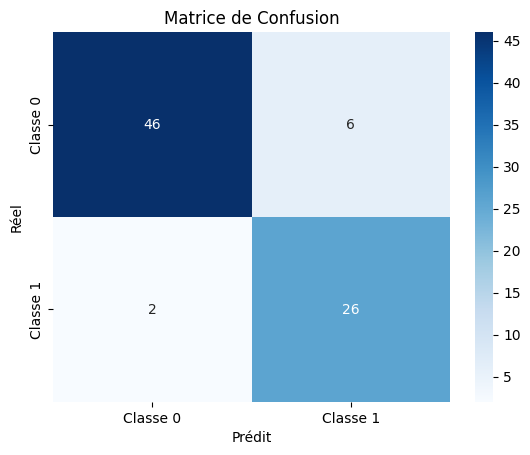

In [55]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [56]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

Précision du modèle : 0.90

Rapport de classification :
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.81      0.93      0.87        28

    accuracy                           0.90        80
   macro avg       0.89      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80



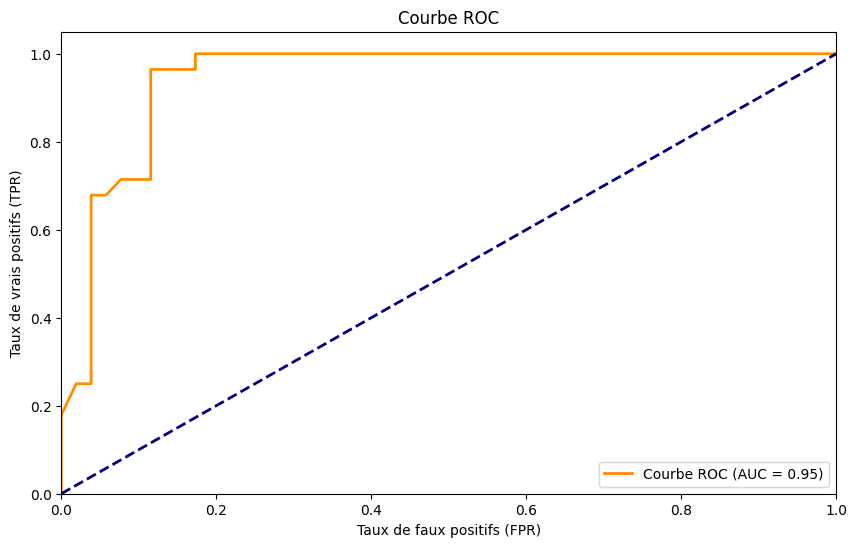

In [57]:
 # Calcul de la courbe ROC
y_scores = rf_model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# 9. Tracer la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Prédictions et évaluation :

Accuracy : La proportion de prédictions correctes sur l'ensemble de test.

Rapport de classification : Le rapport détaillé comprenant la précision, le rappel, et le F1-score.

Matrice de confusion : Pour voir la répartition des classes prédites contre les classes réelles.



In [58]:
#Validation croisée (KFold)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X, y, cv=kf)
print(f"\n Scores de validation croisée (Random Forest) : {scores}")
print(f" Score moyen : {scores.mean():.2f}")


 Scores de validation croisée (Random Forest) : [0.9125 0.9    0.9    0.875  0.8625]
 Score moyen : 0.89


### Validation croisée :

### On effectue une validation croisée avec KFold pour avoir une estimation plus fiable de la performance du modèle sur 5 divisions du dataset.

### ***Scores de validation croisée (Random Forest) : [0.9125 0.9    0.9    0.875  0.8625]***
 ### ***Score moyen : 0.89***

# **✅ modèle :SVC (Support Vector Classifier)**

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [60]:
# 1. Sélectionner un petit échantillon (par exemple 200 lignes)
X_small = X_train.sample(200, random_state=42)
y_small = y_train.loc[X_small.index]

In [61]:
# 2. Créer le modèle SVC avec noyau linéaire et probabilité activée
svc_model = SVC(kernel='linear', random_state=42)

## Création du modèle SVM avec noyau linéaire

In [62]:
# 3. Entraîner le modèle sur le petit échantillon
svc_model.fit(X_small, y_small)

SVC(kernel='linear', random_state=42)

In [63]:
# 4. Prédictions
y_pred = svc_model.predict(X_test)


In [64]:
# 5. Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f" Précision du modèle SVC : {accuracy:.2f}")

 Précision du modèle SVC : 0.80


In [65]:
print("\n🔍 Rapport de classification :\n", classification_report(y_test, y_pred))



🔍 Rapport de classification :
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        52
           1       0.77      0.61      0.68        28

    accuracy                           0.80        80
   macro avg       0.79      0.76      0.77        80
weighted avg       0.80      0.80      0.79        80



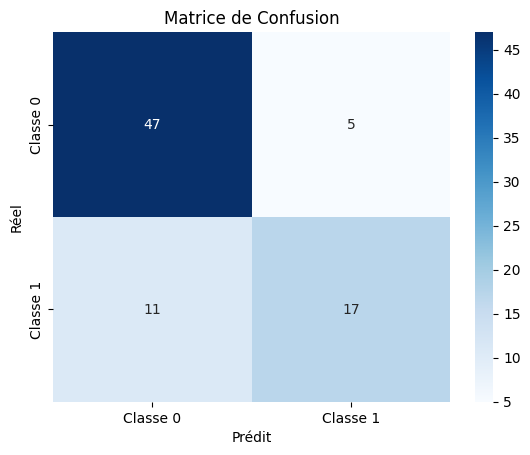

In [66]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

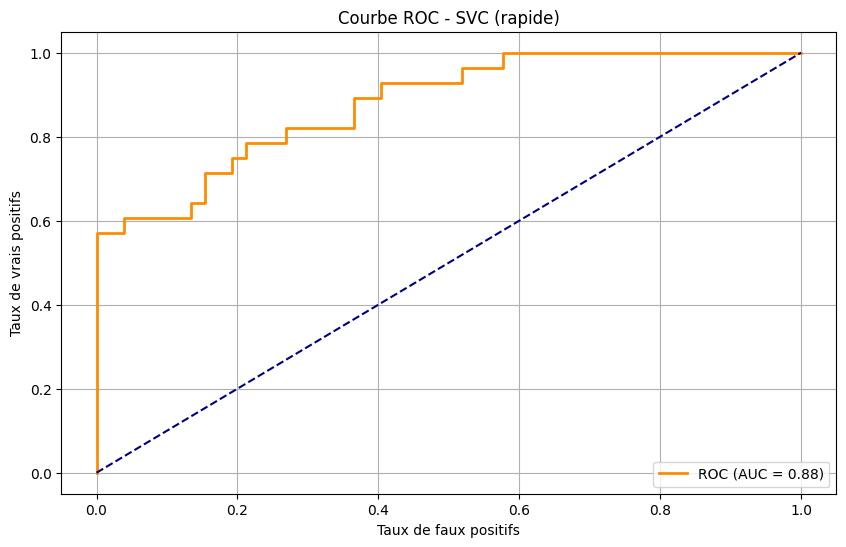

In [67]:
# 6. Courbe ROC avec decision_function au lieu de predict_proba
y_scores = svc_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# 7. Tracer la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("Courbe ROC - SVC (rapide)")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.legend(loc="lower right")
plt.grid()
plt.show()

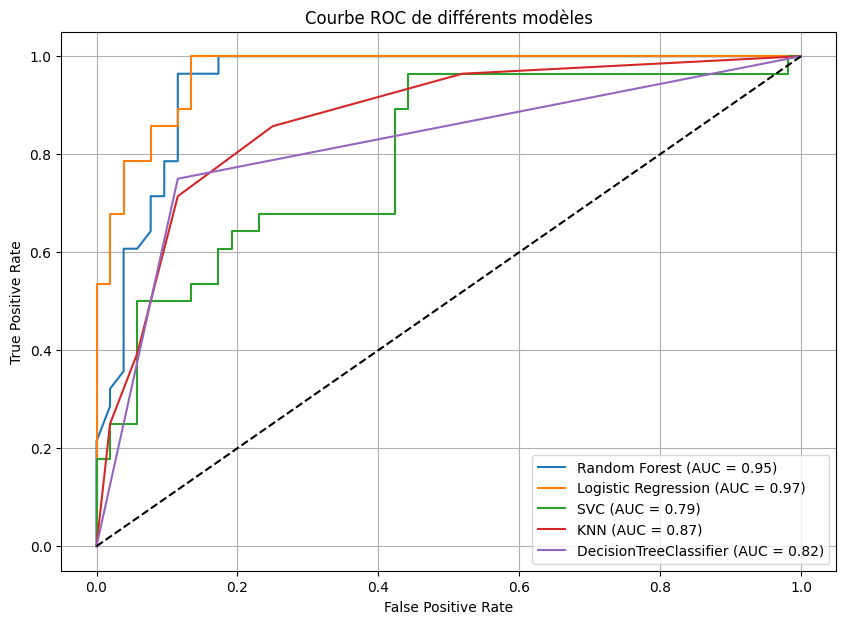

In [68]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier


models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "SVC": SVC(probability=True, class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier()
    #"Gradient Boosting": GradientBoostingClassifier()
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Tracer la ligne de référence
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC de différents modèles')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Prendre une sous-partie des données pour entraîner plus vite
X_sample = X_train.sample(frac=0.3, random_state=42)
y_sample = y_train.loc[X_sample.index]

# Dictionnaire des modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=50),
    "SVC": SVC(kernel='linear', max_iter=1000)
}

# Entraînement + Précision
for name, model in models.items():
    model.fit(X_sample, y_sample)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} :: Accuracy : {acc:.2f}")


Logistic Regression :: Accuracy : 0.84
KNN :: Accuracy : 0.75
Decision Tree :: Accuracy : 0.86
Random Forest :: Accuracy : 0.90
SVC :: Accuracy : 0.44


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 Logistic Regression Accuracy : 0.89


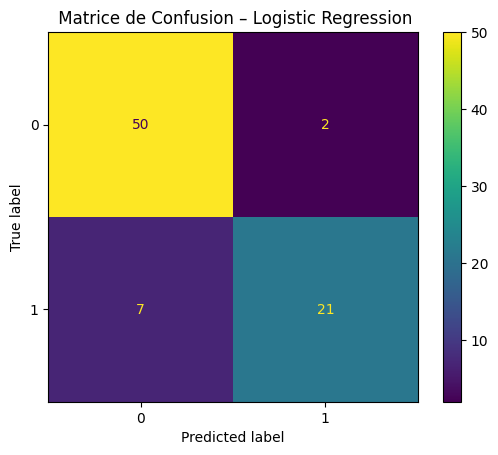

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
print(f" Logistic Regression Accuracy : {acc_lr:.2f}")

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.title(" Matrice de Confusion – Logistic Regression")
plt.show()

 KNN Accuracy : 0.82


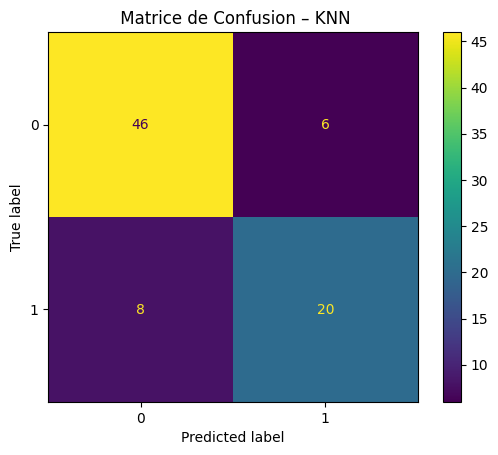

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
print(f" KNN Accuracy : {acc_knn:.2f}")

cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title(" Matrice de Confusion – KNN")
plt.show()

 Decision Tree Accuracy : 0.84


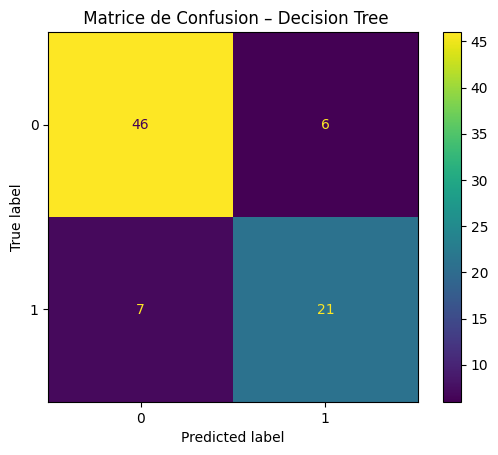

In [77]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
print(f" Decision Tree Accuracy : {acc_dt:.2f}")

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot()
plt.title(" Matrice de Confusion – Decision Tree")
plt.show()

 Random Forest Accuracy : 0.90


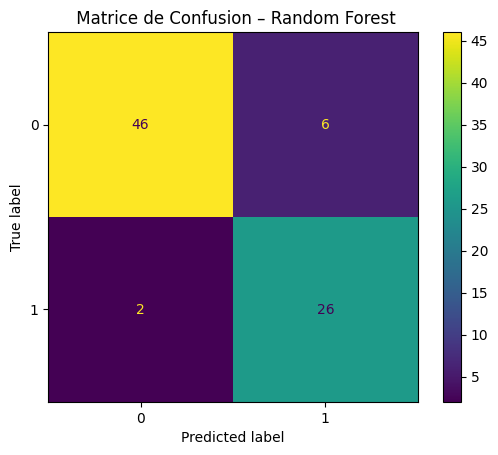

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f" Random Forest Accuracy : {acc_rf:.2f}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title(" Matrice de Confusion – Random Forest")
plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC Accuracy : 0.85


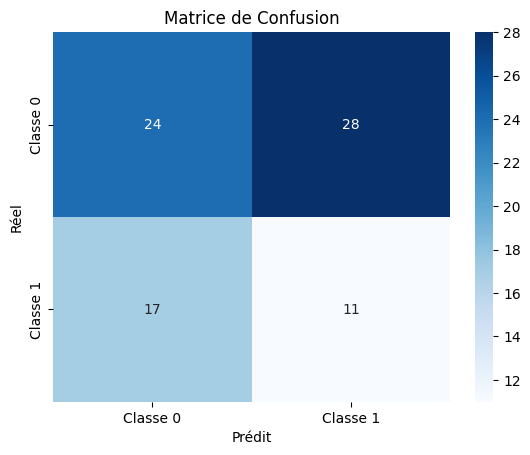

In [81]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', max_iter=1000)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

acc_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy : {acc_svc:.2f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

# **enregistrer le meilleur modèle**

In [84]:
import joblib

In [85]:
joblib.dump(rf, 'best_model_random_forest.pkl')

['best_model_random_forest.pkl']


# Le modèle Random Forest est le plus performant pour ce dataset.

# Il peut être intégré facilement dans une application Web pour prédire l’achat d’un produit selon les caractéristiques d’un utilisateur.

